# Langchain Introduction

LangChain is a framework for developing applications powered by language models. It enables applications that:

- Are context-aware: connect a language model to sources of context (prompt instructions, few shot examples, content to ground its response in, etc.)
- Reason: rely on a language model to reason (about how to answer based on provided context, what actions to take, etc.)
This framework consists of several parts.

1. LangChain Libraries: The Python and JavaScript libraries. Contains interfaces and integrations for a myriad of components, a basic run time for combining these components into chains and agents, and off-the-shelf implementations of chains and agents.
2. LangChain Templates: A collection of easily deployable reference architectures for a wide variety of tasks.
3. LangServe: A library for deploying LangChain chains as a REST API.
4. LangSmith: A developer platform that lets you debug, test, evaluate, and monitor chains built on any LLM framework and seamlessly integrates with LangChain.

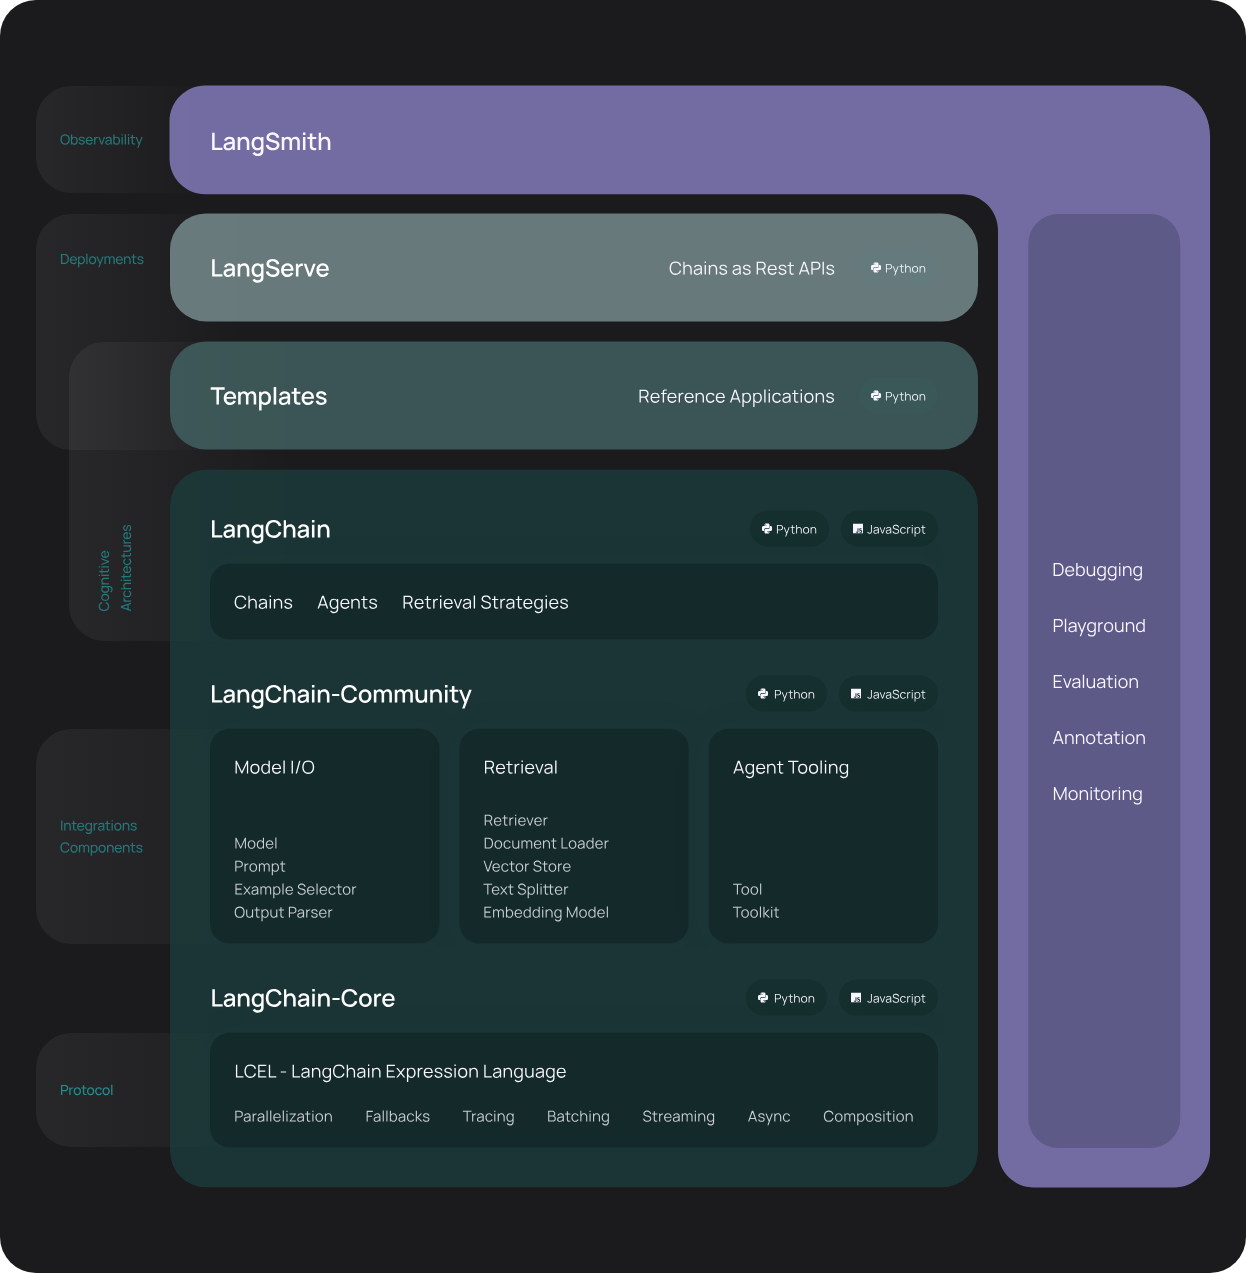

This tutorial will lead through layer by layer inspection of the Langchain Framework

## Langchain Expression Language (LCEL)



LCEL is a declarative way to compose chains. LCEL was designed from day 1 to support putting prototypes in production, with no code changes, from the simplest “prompt + LLM” chain to the most complex chains.

*Modules*

LangChain provides standard, extendable interfaces and integrations for the following modules:

1. Model I/O
Interface with language models

2. Retrieval
Interface with application-specific data

3. Agents
Let models choose which tools to use given high-level directives


## Workplace Installation & Setting

**1 . Venv Required :**

Using a virtual environment in Python development, including for projects like LMS (Learning Management Systems), offers several benefits that enhance the development process and ensure the application's reliability and stability. Here's why a virtual environment is particularly useful for LMS projects:

* Dependency Management: LMS projects often depend on a wide range of external libraries and modules. A virtual environment allows you to manage these dependencies efficiently, ensuring that each project has access to the correct versions of the libraries it requires. This is crucial for avoiding conflicts between different versions of the same library that might be used in different projects.

* Isolation: Virtual environments create an isolated environment for each project. This means that changes made in one project's environment (such as updating a library or installing a new package) do not affect other projects. This isolation is particularly important for LMS projects that may have specific requirements or dependencies that differ from other Python projects you're working on.

* Replicability: When working on an LMS project, especially in a team setting, it's important that all developers work within environments that are as similar as possible. Virtual environments allow you to replicate the project's environment across different machines and development setups, reducing the "it works on my machine" problem.

* Simplifies Deployment: By using a virtual environment, you can more easily manage and package your application for deployment. Whether you're deploying to a testing environment or to production, you can ensure that the server has an environment set up that matches your development environment, including all necessary dependencies. This simplifies the deployment process and reduces the risk of deployment-related issues.

**How to create a venv from VS code**


1. Open terminal using CTRL-ALT-P at the voice Terminal Select Default Profile 
(You can access also from toolbar at the voice Terminal -> New Terminal )

2. create a virtual environment from Command Line Interface (CLI) using:  python -m venv (name of virtual environment)

3. Activate the Virtual environment using: .\venv\Scripts\activate.bat

`In case the policies are not set correctly (not allowing the user to create venv) use : Set-ExecutionPolicy -ExecutionPolicy RemoteSigned -Scope CurrentUser`

Be aware of checking the python version of your venv and its compatibility with the other libraries you are intended to use with : python --version

**2 . Install Langchain dependencies**

`pip install langchain`

This will install the bare minimum requirements of LangChain. A lot of the value of LangChain comes when integrating it with various model providers, datastores, etc. By default, the dependencies needed to do that are NOT installed. You will need to install the dependencies for specific integrations separately.

`pip install langchain-community`

The langchain-community package contains third-party integrations. It is automatically installed by langchain, but can also be used separately. 

`pip install langchain-core`

The langchain-core package contains base abstractions that the rest of the LangChain ecosystem uses, along with the LangChain Expression Language. It is automatically installed by langchain, but can also be used separately.

`pip install langchain-experimental`

The langchain-experimental package holds experimental LangChain code, intended for research and experimental uses.

`pip install "langserve[all]"`

LangServe helps developers deploy LangChain runnables and chains as a REST API. LangServe is automatically installed by LangChain CLI. If not using LangChain CLI.


`pip install langchain-cli`

The LangChain CLI is useful for working with LangChain templates and other LangServe projects

`pip install langsmith`

The LangSmith SDK is automatically installed by LangChain

In [49]:
pip install -r C:/Users/ALBER/RAG/requirements.txt

Note: you may need to restart the kernel to use updated packages.


**Set LangSmith** 

Many of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls. As these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent. The best way to do this is with LangSmith.

Note that LangSmith is not needed, but it is helpful. If you do want to use LangSmith, after you sign up at the link above, make sure to set your environment variables to start logging traces:

## Building with LangChain

LangChain enables building application that connect external sources of data and computation to LLMs.

Example:

We'll show how to use models available via API, like OpenAI, and local open source models, using integrations like Ollama.


## Theory: `Deep Dive in Model I/O`

https://python.langchain.com/docs/modules/model_io

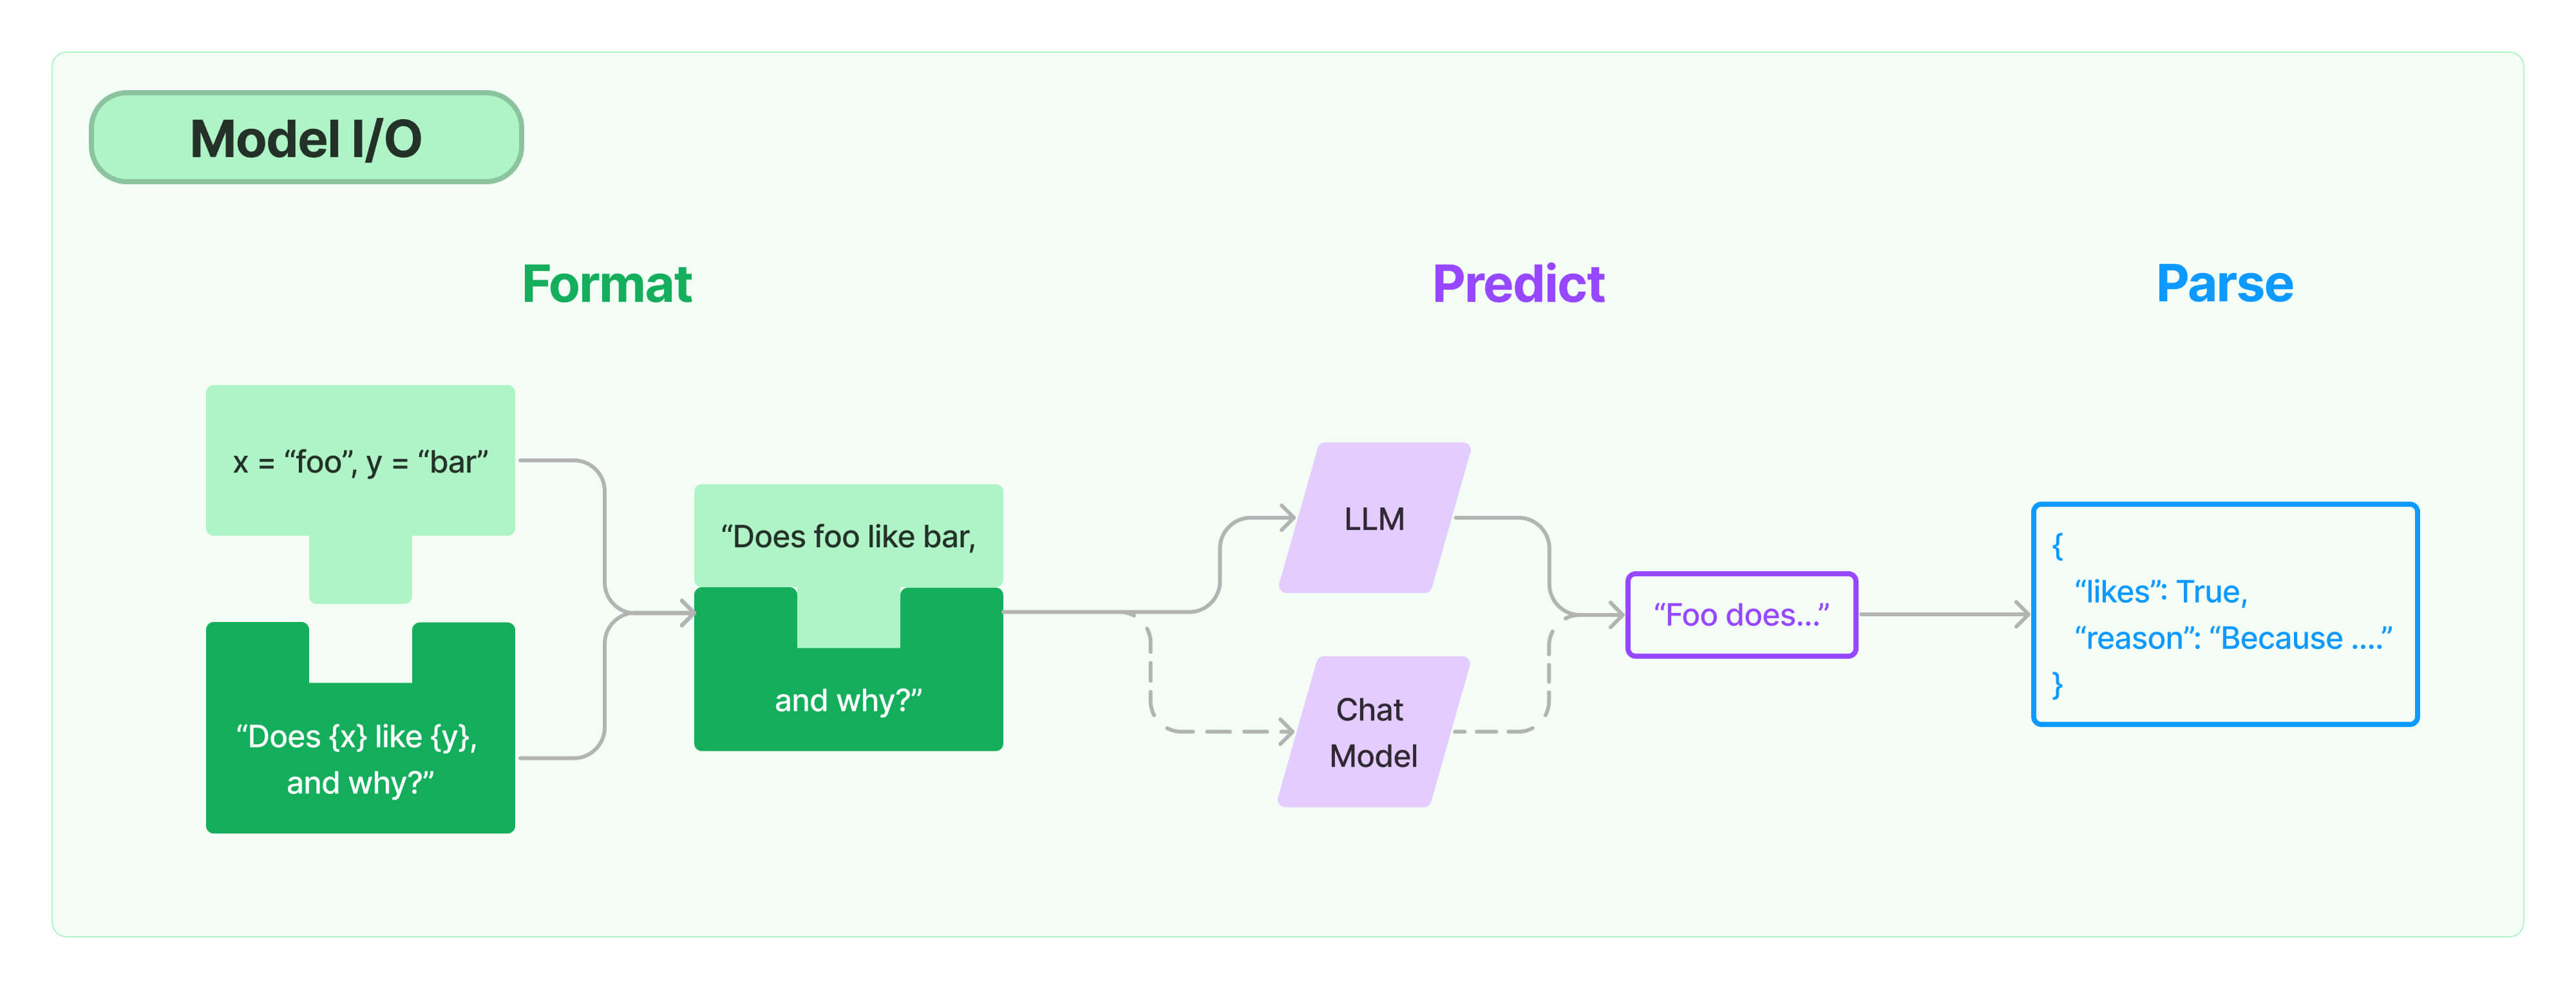

The core element of any language model application is...the model. LangChain gives you the building blocks to interface with any language model. Everything in this section is about making it easier to work with models. This largely involves a clear interface for what a model is, helper utils for constructing inputs to models, and helper utils for working with the outputs of models.


There are 2 main types of models :

* Pure LLM

LLMs in LangChain refer to pure text completion models. The APIs they wrap take a string prompt as input and output a string completion

* `Chat models`

Chat models are often backed by LLMs but tuned specifically for having conversations. Crucially, their provider APIs use a different interface than pure text completion models. Instead of a single string, they take a list of chat messages as input and they return an AI message as output.

LangChain makes it possible to treat them interchangeably, that doesn't mean you should. In particular, the prompting strategies for LLMs vs ChatModels may be quite different.

Also different LLMs have different prompting strategies and file formatting making a common strategy not universally suitable.

*Explanation wit code*

In [50]:
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAI
import os 

# open_api_key = os.environ.get('OPEN_API_KEY')
chat_llm = ChatOpenAI(openai_api_key=os.environ.get('OPEN_API_KEY'))

pure_llm = OpenAI(openai_api_key=os.environ.get('OPEN_API_KEY')) 

`Chat-Models`

**Messages**

ChatModels take a list of messages as input and return a message. There are a few different types of messages. All messages have a role and a content property. The role describes WHO is saying the message. LangChain has different message classes for different roles. The content property describes the content of the message.

In addition, messages have an additional_kwargs property:

- Human message 
- AIMessage 
- System Message 
- Function Message 
- Tool Message


**Prompts** 

The inputs to language models are often called prompts. Oftentimes, the user input from your app is not the direct input to the model. Rather, their input is transformed in some way to produce the string or list of messages that does go into the model. The objects that take user input and transform it into the final string or messages are known as "Prompt Templates".

In few words , it is an abstraction of the input provided by the user

* Prompt Value 
* Prompt Template 
* MessagePromptTemplate 
* Message Placeholder 
* ChatPromptTemplate

**Parser** 

The output of models are either strings or a message. Oftentimes, the string or messages contains information formatted in a specific format to be used downstream (e.g. a comma separated list, or JSON blob). Output parsers are responsible for taking in the output of a model and transforming it into a more usable form.

* StrOutputParser 
* OpenAI Function Parser 
* Agent Output Parser

## Building Elementary Chat Model Chain

*Model Initialization OPEN-AI* 

Use the OPENAI API KEY from your .env file (this is for storing securely the variables) and instantiate the model.

In [51]:
from langchain_openai import ChatOpenAI
import os 

# open_api_key = os.environ.get('OPEN_API_KEY')
llm = ChatOpenAI(openai_api_key=os.environ.get('OPEN_API_KEY'))

*Simple-Invocation*

Once you've installed and initialized the LLM of your choice, we can try using it! Let's ask it what LangSmith is - this is something that wasn't present in the training data so it shouldn't have a very good response.


In [52]:
llm.invoke("how can langsmith help with testing?")

AIMessage(content='Langsmith can help with testing by providing automated testing tools and frameworks that can be used to test software applications. These tools can help streamline the testing process, improve test coverage, and identify issues early on in the development cycle. Langsmith can also provide test scripts, test cases, and test data that can be used to thoroughly test the software and ensure its quality. Additionally, Langsmith can provide testing services, such as manual testing, automated testing, performance testing, and security testing, to help ensure that the software meets the necessary quality standards.', response_metadata={'token_usage': {'completion_tokens': 109, 'prompt_tokens': 15, 'total_tokens': 124}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': 'fp_3b956da36b', 'finish_reason': 'stop', 'logprobs': None}, id='run-50669913-0c53-4c41-b4bb-30f30e6ee00f-0')

*Invocation with Prompt* 

We can also guide it's response with a prompt template. Prompt templates are used to convert raw user input to a better input to the LLM.

In [53]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are world class technical documentation writer."),
    ("user", "{input}")
])

In [54]:
chain = prompt | llm  #Build your first chain

In [55]:
chain.invoke({"input": "how can langsmith help with testing?"})

AIMessage(content='Langsmith is a powerful tool that can greatly assist with testing activities in software development. Here are some ways in which Langsmith can help with testing:\n\n1. **Automated Testing:** Langsmith can be used to automatically generate test cases based on the specifications and requirements of the software. This can save time and effort in creating test cases manually.\n\n2. **Test Data Generation:** Langsmith can assist in generating realistic and diverse test data that can be used to thoroughly test the software under different scenarios.\n\n3. **Quality Assurance:** Langsmith can help in ensuring the quality of the software by identifying potential issues and bugs early in the development process.\n\n4. **Code Coverage Analysis:** Langsmith can be used to analyze code coverage and identify areas of the code that have not been tested adequately. This can help in improving the overall test coverage of the software.\n\n5. **Regression Testing:** Langsmith can aut

*Output Parser*

The output of a ChatModel (and therefore, of this chain) is a message. However, it's often much more convenient to work with strings. Let's add a simple output parser to convert the chat message to a string.

In [56]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

chain = prompt | llm | output_parser  # New chain (simply adding a new element)

chain.invoke({"input": "how can langsmith help with testing?"})

'Langsmith can greatly assist with testing by providing automated language testing capabilities. Here are some ways Langsmith can help with testing:\n\n1. Language Quality Assurance: Langsmith can analyze and evaluate the quality of the language used in your software, ensuring correctness, consistency, and clarity. This can help identify and fix any language-related issues before they impact the user experience.\n\n2. Automated Translation Testing: Langsmith can automate the testing of translations in your software by comparing the original text with translated versions. This can help ensure that translations are accurate and maintain the intended meaning.\n\n3. Localization Testing: Langsmith can assist with testing the localization of your software, ensuring that it is culturally appropriate and linguistically accurate for different target markets. This can help identify any issues with language and cultural nuances that may affect user experience.\n\n4. Compliance Testing: Langsmith

`Schema`

*Note: I forgot to insert the Prompting block* 
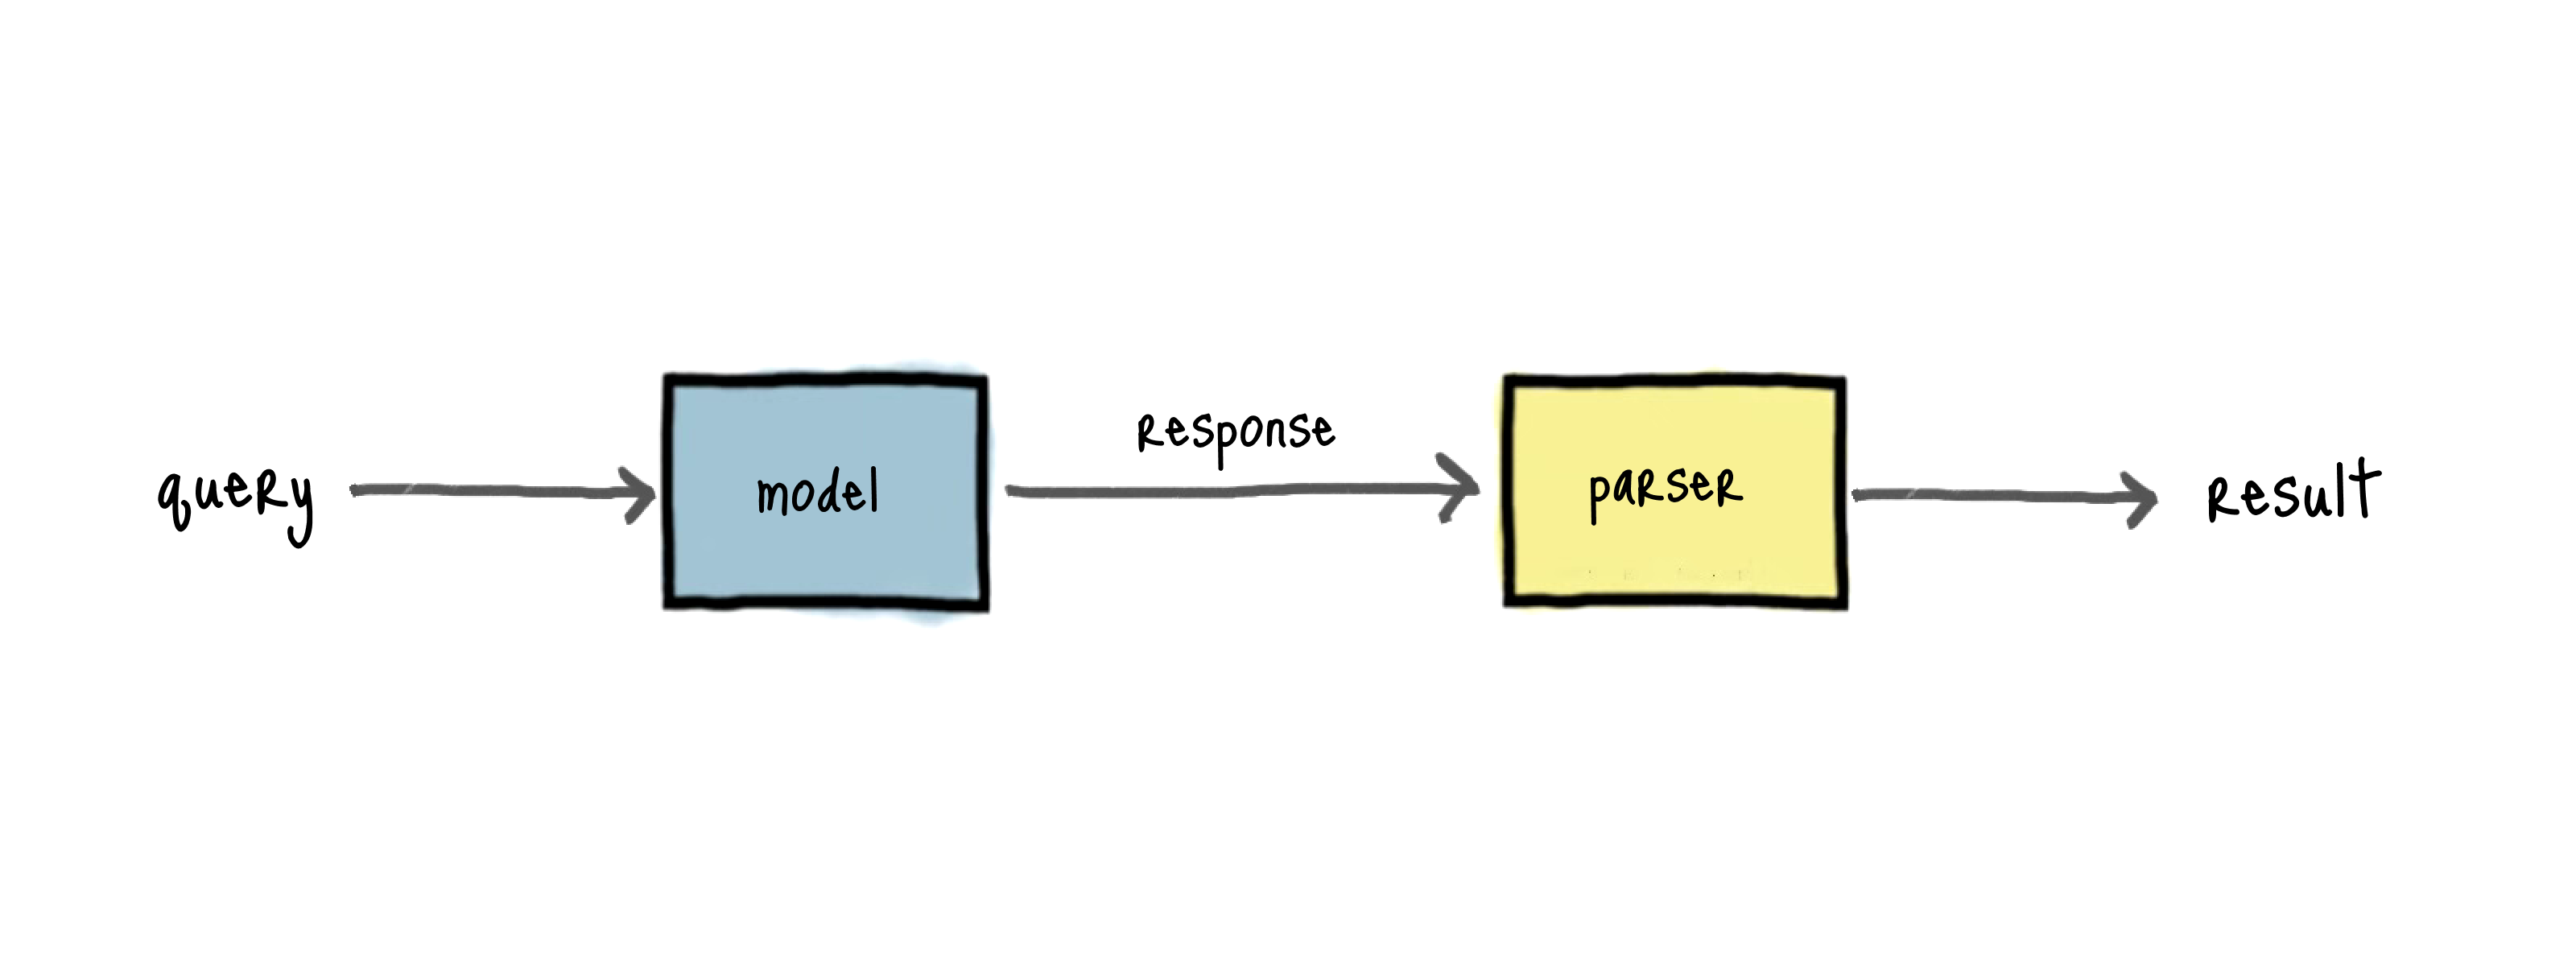

### Build Elementary Retrieval Augmented Generation using Context information and combination of chains: 

In [57]:
## Build a RAG application from scratch 

from langchain.prompts import ChatPromptTemplate

template = """Answer the question based on the context below , if you don't know answer , i don't know 

Context: {context}

Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)

prompt.format(context="Mary's sister is Susana",question = "Who is Mary's sister?")

chain = prompt | llm | output_parser

chain.invoke({"context":"Mary's sister is Susana",
             "question": "Who is Mary's Sister?"})
# Combining Chains
translation_prompt = ChatPromptTemplate.from_template("Traslate {answer} to {language}")

from operator import itemgetter

translation_chain = ({"answer": chain , "language": itemgetter("language")}| translation_prompt | llm | output_parser)



translation_chain.invoke(
    {
        "context":"Mary's sister is Susana . She doesn't have sibilings",
        "question":"How many sister does Mary have?",
        "language":"Spanish",
    }
)

'Mary tiene una hermana, Susana.'

`Schema`

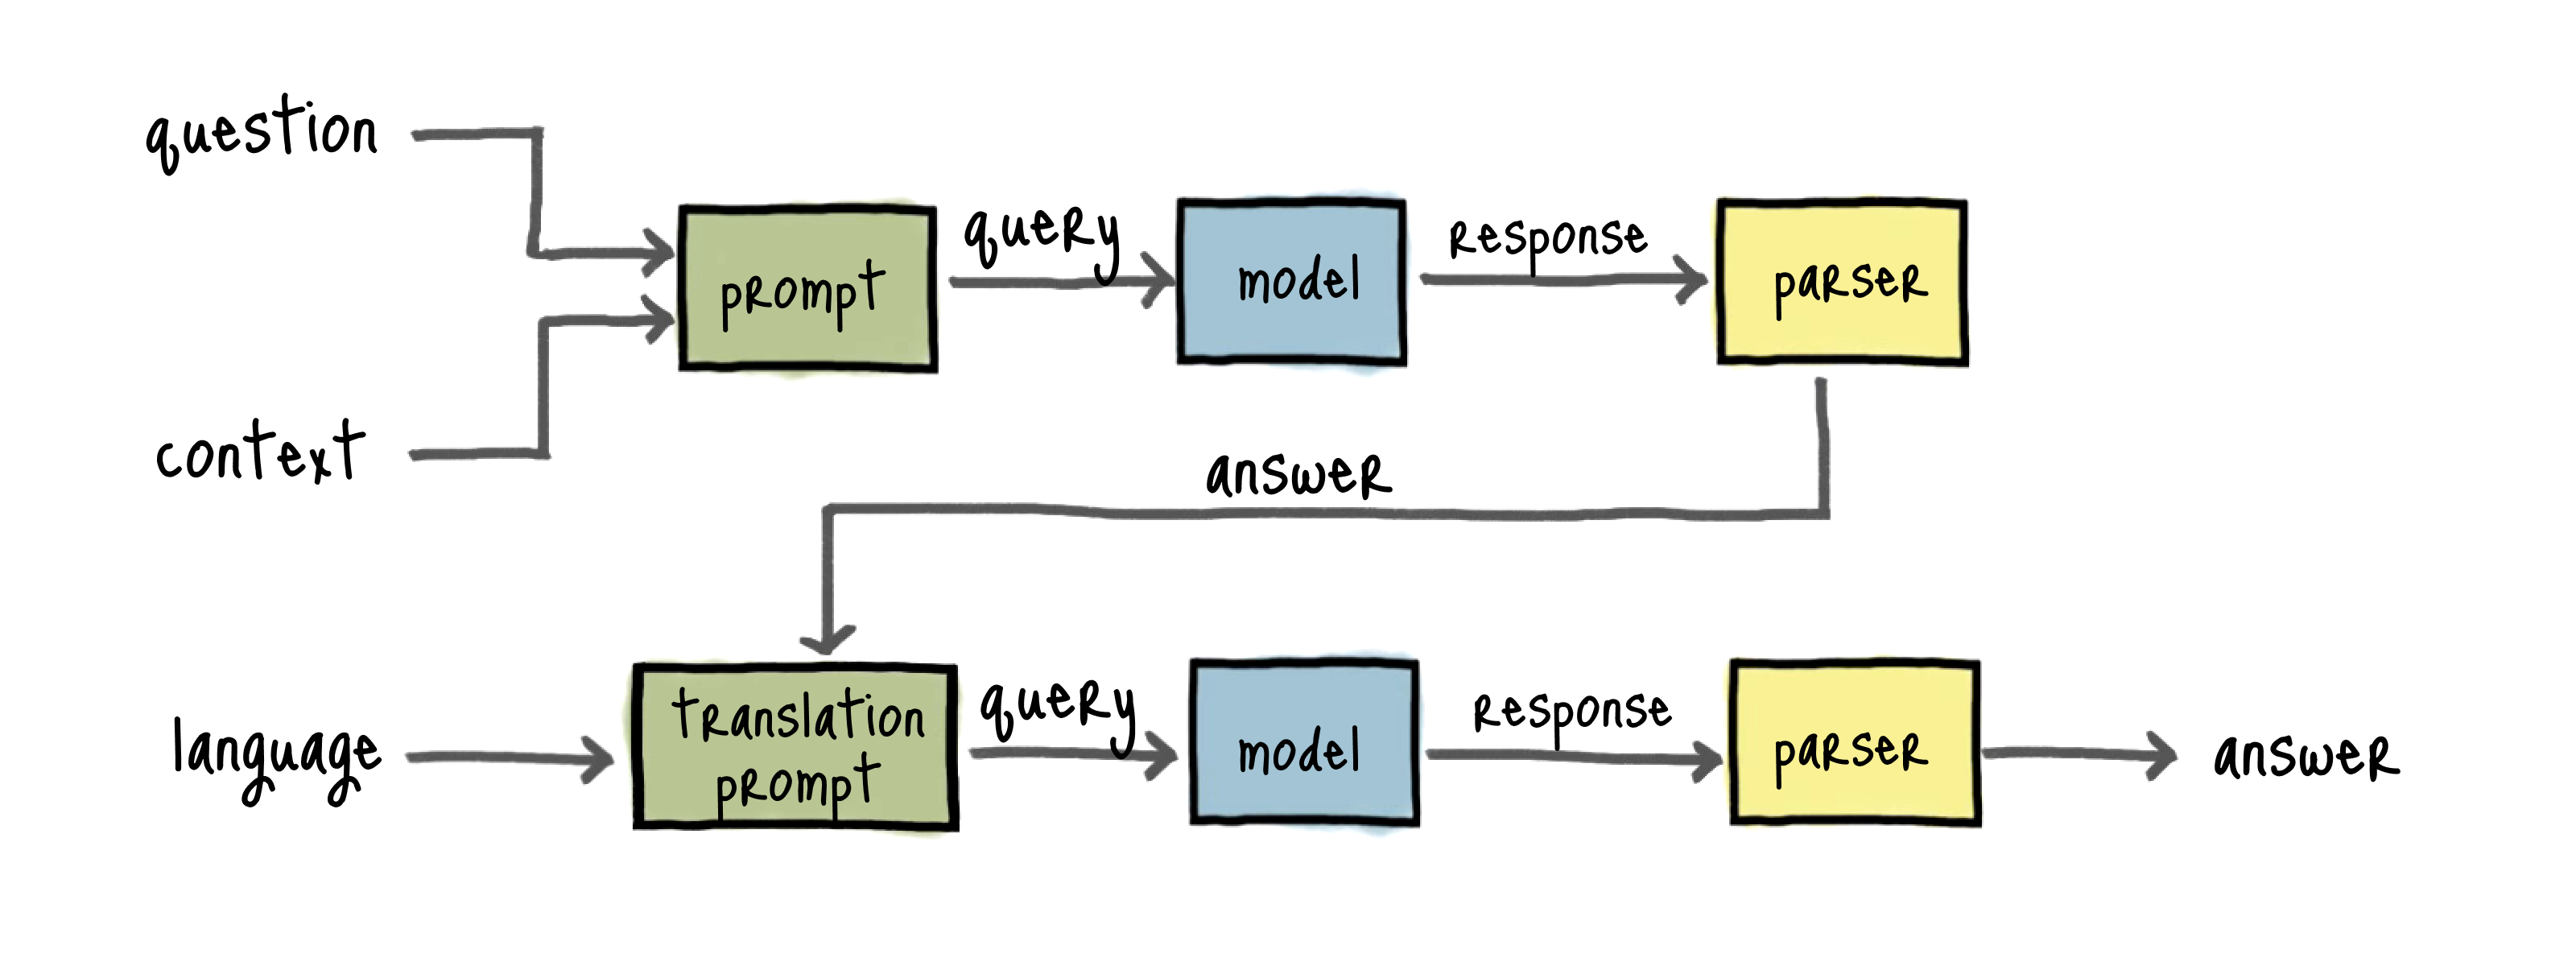

## Retrieval Augmented Generation (RAG) Chain 

Many LLM applications require user-specific data that is not part of the model's training set. The primary way of accomplishing this is through Retrieval Augmented Generation (RAG). In this process, external data is retrieved and then passed to the LLM when doing the generation step.

LangChain provides all the building blocks for RAG applications - from simple to complex. This section of the documentation covers everything related to the retrieval step - e.g. the fetching of the data. Although this sounds simple, it can be subtly complex. This encompasses several key modules.

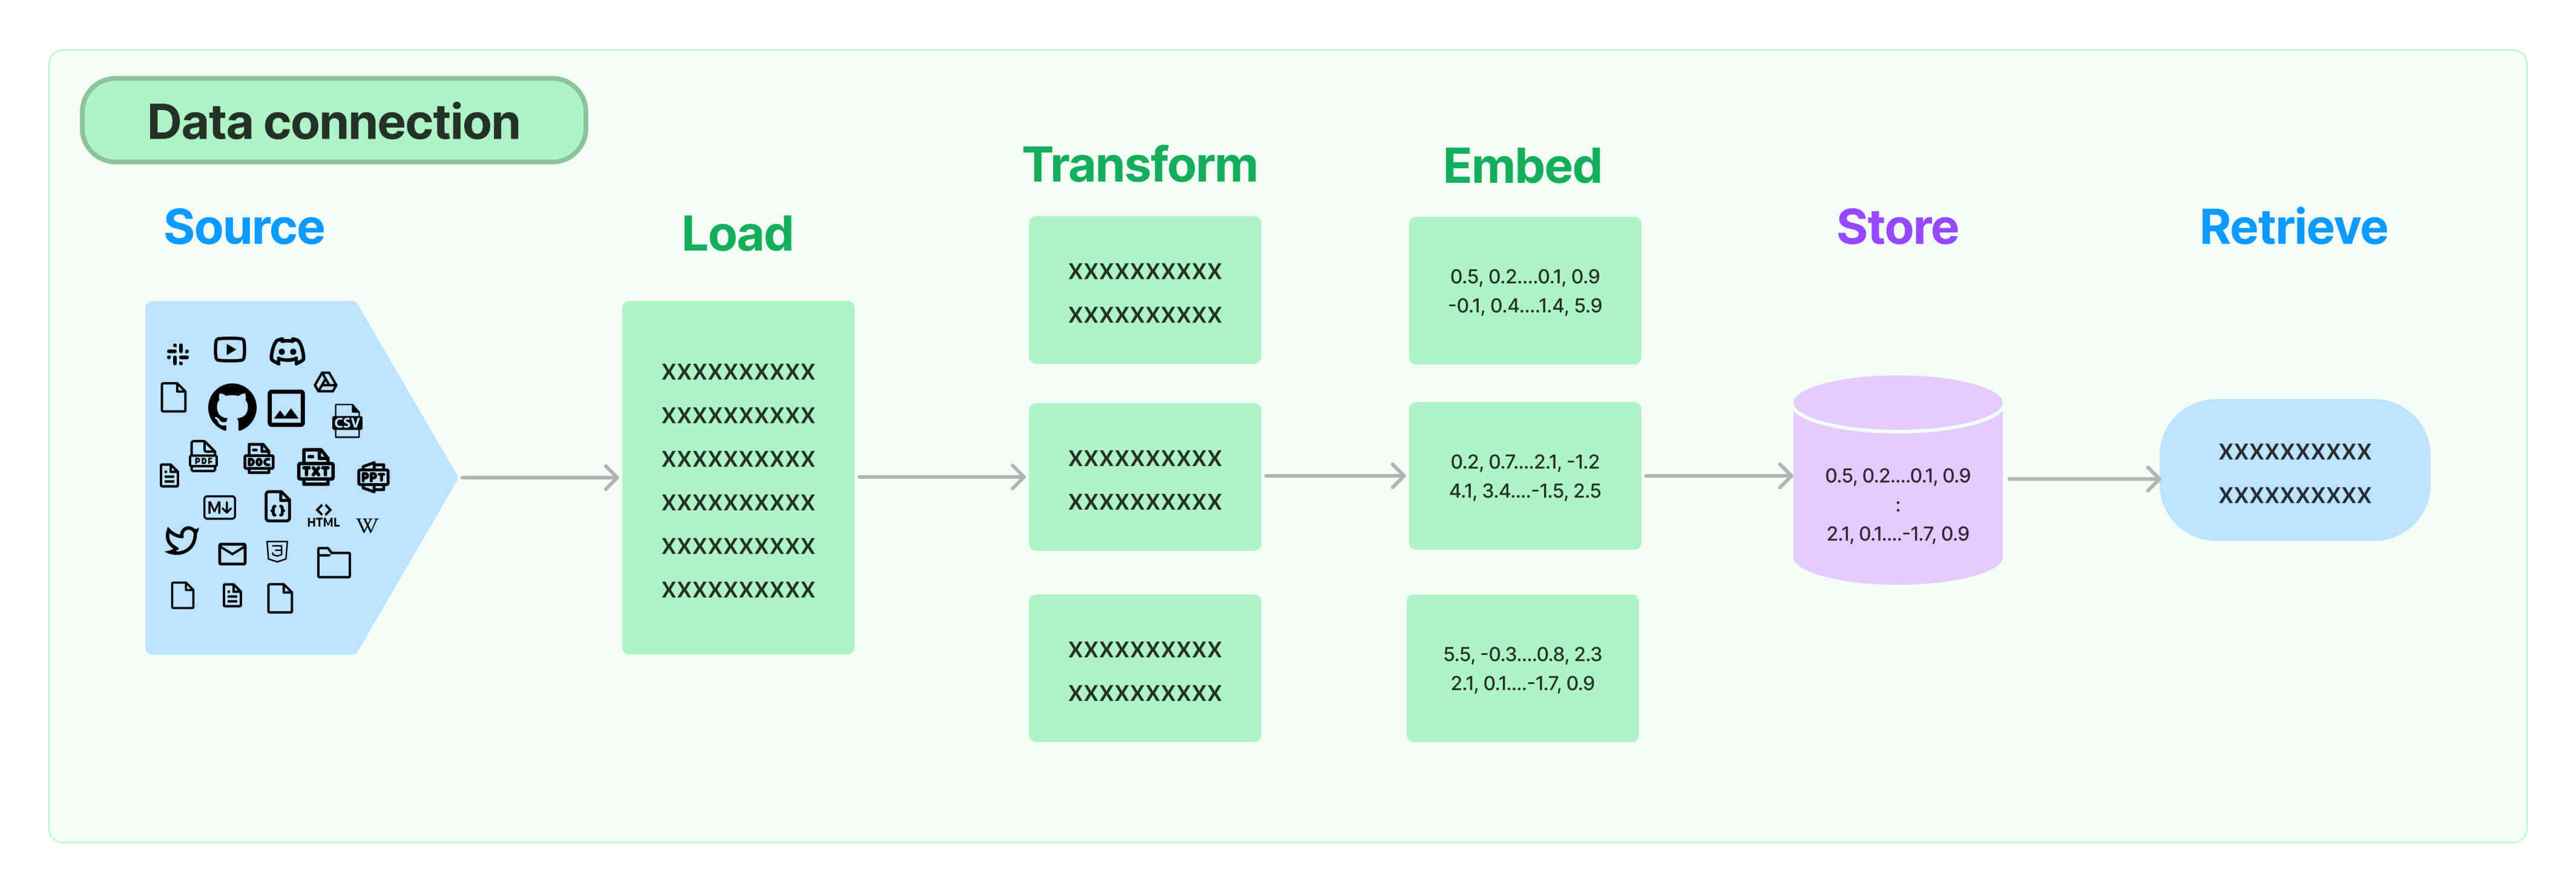

Components : 

* **Document loaders**

Document loaders load documents from many different sources. LangChain provides over 100 different document loaders as well as integrations with other major providers in the space, like AirByte and Unstructured. LangChain provides integrations to load all types of documents (HTML, PDF, code) from all types of locations (private S3 buckets, public websites).

* **Text Splitting**

A key part of retrieval is fetching only the relevant parts of documents. This involves several transformation steps to prepare the documents for retrieval. One of the primary ones here is splitting (or chunking) a large document into smaller chunks. LangChain provides several transformation algorithms for doing this, as well as logic optimized for specific document types (code, markdown, etc).

* **Text embedding models**

Another key part of retrieval is creating embeddings for documents. Embeddings capture the semantic meaning of the text, allowing you to quickly and efficiently find other pieces of a text that are similar. LangChain provides integrations with over 25 different embedding providers and methods, from open-source to proprietary API, allowing you to choose the one best suited for your needs. LangChain provides a standard interface, allowing you to easily swap between models.

* **Vector stores**

With the rise of embeddings, there has emerged a need for databases to support efficient storage and searching of these embeddings. LangChain provides integrations with over 50 different vectorstores, from open-source local ones to cloud-hosted proprietary ones, allowing you to choose the one best suited for your needs. LangChain exposes a standard interface, allowing you to easily swap between vector stores.

* **Retrievers**

Once the data is in the database, you still need to retrieve it. LangChain supports many different retrieval algorithms and is one of the places where we add the most value. LangChain supports basic methods that are easy to get started - namely simple semantic search. However, we have also added a collection of algorithms on top of this to increase performance. These include:

1. Parent Document Retriever: This allows you to create multiple embeddings per parent document, allowing you to look up smaller chunks but return larger context.
2. Self Query Retriever: User questions often contain a reference to something that isn't just semantic but rather expresses some logic that can best be represented as a metadata filter. Self-query allows you to parse out the semantic part of a query from other metadata filters present in the query.
3. Ensemble Retriever: Sometimes you may want to retrieve documents from multiple different sources, or using multiple different algorithms. The ensemble retriever allows you to easily do this.

* **Indexing**

The LangChain Indexing API syncs your data from any source into a vector store, helping you:

1. Avoid writing duplicated content into the vector store
2. Avoid re-writing unchanged content
3. Avoid re-computing embeddings over unchanged content

* ### **Document Loading**

**`Legal Domain Step-1`**

Starting from the Chart of Foundamental rights our journey:

https://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:12016P/TXT

In [59]:
pip install pypdf

Note: you may need to restart the kernel to use updated packages.


In [60]:
from pypdf import PdfReader 

loader =PdfReader("C:/Users/ALBER/OneDrive/Desktop/CELEX_12016P_TXT_EN_TXT.pdf")
print(len(loader.pages))
page = loader.pages[3]

page

17


{'/Type': '/Page',
 '/StructParents': 4,
 '/MediaBox': [0, 0, 595.276, 841.89],
 '/Resources': {},
 '/Contents': {'/Filter': '/FlateDecode'},
 '/Parent': {'/Type': '/Pages',
  '/Kids': [IndirectObject(356, 0, 2199013790096),
   IndirectObject(1, 0, 2199013790096),
   IndirectObject(3, 0, 2199013790096),
   IndirectObject(5, 0, 2199013790096),
   IndirectObject(7, 0, 2199013790096),
   IndirectObject(9, 0, 2199013790096),
   IndirectObject(11, 0, 2199013790096),
   IndirectObject(13, 0, 2199013790096),
   IndirectObject(15, 0, 2199013790096),
   IndirectObject(20, 0, 2199013790096)],
  '/Count': 10,
  '/Parent': {'/Type': '/Pages',
   '/Count': 17,
   '/Kids': [IndirectObject(47, 0, 2199013790096),
    IndirectObject(48, 0, 2199013790096)]}},
 '/Rotate': 0,
 '/CropBox': [0, 0, 595.276, 841.89]}

In [61]:
from pypdf import PdfReader

# Specify the path to your PDF file
pdf_path = "C:/Users/ALBER/OneDrive/Desktop/CELEX_12016P_TXT_EN_TXT.pdf"
# Specify the path for the output text file
output_text_path = "output_text.txt"

# Creating a PDF reader object
reader = PdfReader(pdf_path)

# Open the output text file for writing
with open(output_text_path, 'w', encoding='utf-8') as text_file:
    # Iterate over all pages
    for page in reader.pages:
        # Extract text from the current page
        text = page.extract_text()
        # Write the extracted text to the output file
        if text:  # Check if text was extracted to avoid adding None
            text_file.write(text + "\n")  # Add a newline to separate pages

print(f"Text extracted and saved to {output_text_path}")

Text extracted and saved to output_text.txt


* ### **Text Splitting** 

When you want to deal with long pieces of text, it is necessary to split up that text into chunks. As simple as this sounds, there is a lot of potential complexity here. Ideally, you want to keep the semantically related pieces of text together. What "semantically related" means could depend on the type of text. This notebook showcases several ways to do that.

At a high level, text splitters work as following:

Split the text up into small, semantically meaningful chunks (often sentences).
Start combining these small chunks into a larger chunk until you reach a certain size (as measured by some function).
Once you reach that size, make that chunk its own piece of text and then start creating a new chunk of text with some overlap (to keep context between chunks).
That means there are two different axes along which you can customize your text splitter:

- How the text is split
- How the chunk size is measured

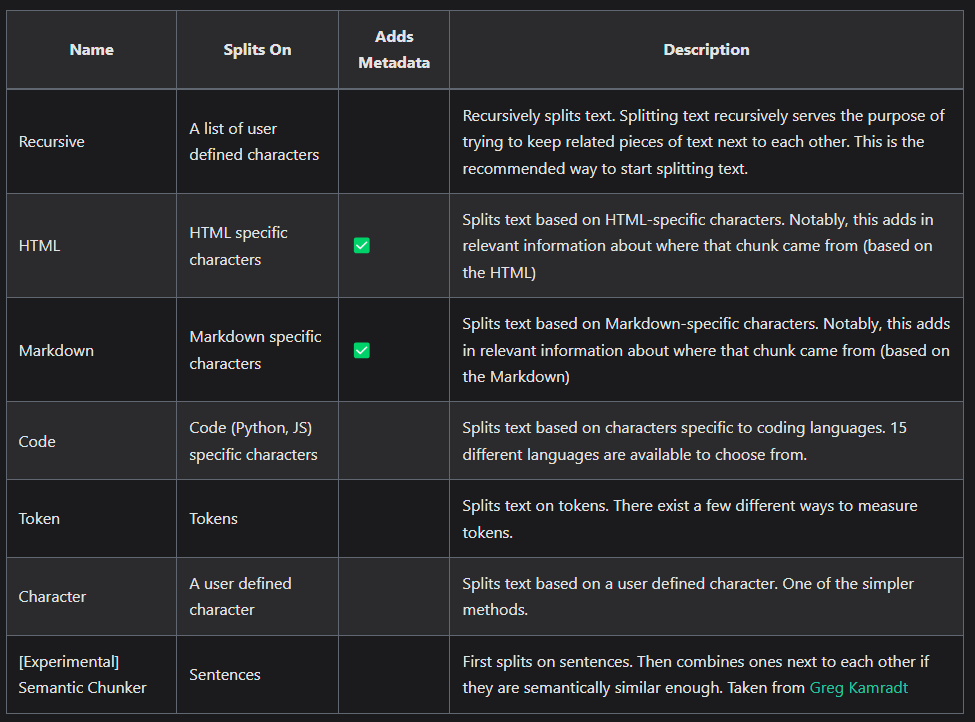

**Evaluate text splitters**

You can evaluate text splitters with the Chunkviz utility created by Greg Kamradt. Chunkviz is a great tool for visualizing how your text splitter is working. It will show you how your text is being split up and help in tuning up the splitting parameters.

**Chunking evaluation can be performed at https://chunkviz.up.railway.app/#explanation

# Chunking

**Continue : CHART OF Foundamental Rights**

**`Legal Domain Step-2`**

**Chunking with metadata Generation**

In [ ]:
# This is a long document we can split up.
with open("output_text.txt") as f:
    Constitut = f.read()

from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings
text_splitter = SemanticChunker(OpenAIEmbeddings())
docs = text_splitter.create_documents([docs])
print(docs[20].page_content)

Compliance with these rules shall be subject to control by an independent authority. Article 9  
Right to marry and right to found a family  
The right to marry and the right to found a family shall be guaranteed in accordance with the 
national laws governing the exercise of these rights. Article 10  
Freedom of thought, conscience and religion  
1. Everyone has the right to freedom of thought, conscience and religion. This right includes 
freedom to change religion or belief and freedom, eith er alone or in community with others and in 
public or in private, to manifest religion or belief, in worship, teaching, practice and observance. 2. The right to conscientious objection is recognised, in accordance with the national laws 
governing the exercise of this right.EN 7.6.2016 Official Journal of the European Union C 202/395
 
Article 11  
Freedom of expression and information  
1. Everyone has the right to freedom of expression.


In [67]:
from langchain_community.document_transformers.openai_functions import (
    create_metadata_tagger,
)
from langchain_core.documents import Document
from langchain_openai import ChatOpenAI

schema = {
    "properties": {
        "Article": {"type": "string"},
        "subject": {"type": "string"},
    },
    "required": ["Article" , "subject"],
}

# Must be an OpenAI model that supports functions
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613")

document_transformer = create_metadata_tagger(metadata_schema=schema, llm=llm)
enhanced_documents = document_transformer.transform_documents(docs)

In [68]:
import json

print(
    *[d.page_content + "\n\n" + json.dumps(d.metadata) for d in enhanced_documents],
    sep="\n\n---------------\n\n",
)

CHARTER OF FUNDAMENTAL RIGHTS OF THE 
EUROPEAN UNION  
(2016/C 202/02)EN 7.6.2016 Official Journal of the European Union C 202/389
 
Table of Contents  
Page  
PREAMBLE . .

{"Article": "CHARTER OF FUNDAMENTAL RIGHTS OF THE EUROPEAN UNION (2016/C 202/02)EN 7.6.2016 Official Journal of the European Union C 202/389", "subject": "PREAMBLE"}

---------------

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

{"Article": ". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .", "subject": "properties"}

---------------

. 393  
TITLE I DIGNITY . .

{"Article": "393", "subject": "DIGNITY"}

---------------

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

{"Article": ". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .", "subject": "properties"}

---------------

. 394  
TITLE II FREEDOMS . .

{"Article": ". 39

Or Better 

**Standard Chunking**

In [69]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator="Article",
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    is_separator_regex=False,
)
texts = text_splitter.create_documents([Constitut])
import json

print(
    *[d.page_content + "\n\n" + json.dumps(d.metadata) for d in texts],
    sep="\n\n---------------\n\n",
)

Created a chunk of size 3916, which is longer than the specified 1000
Created a chunk of size 1065, which is longer than the specified 1000
Created a chunk of size 1932, which is longer than the specified 1000


CHARTER OF FUNDAMENTAL RIGHTS OF THE 
EUROPEAN UNION  
(2016/C 202/02)EN 7.6.2016 Official Journal of the European Union C 202/389
 
Table of Contents  
Page  
PREAMBLE . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 393  
TITLE I DIGNITY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 394  
TITLE II FREEDOMS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 395  
TITLE III EQUALITY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 397  
TITLE IV SOLIDARITY . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 399  
TITLE V CITIZENS' RIGHTS . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 401  
TITLE VI JUSTICE . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 403  
TITLE VII GENERAL 

texts = text_splitter.create_documents([OSCAR_2024])
print(texts[0])

# Embeddings

* #### **Embedding model** [https://python.langchain.com/docs/modules/data_connection/text_embedding]  


The Embeddings class is a class designed for interfacing with text embedding models. There are lots of embedding model providers (OpenAI, Cohere, Hugging Face, etc) - this class is designed to provide a standard interface for all of them.

Embeddings create a vector representation of a piece of text. This is useful because it means we can think about text in the vector space, and do things like semantic search where we look for pieces of text that are most similar in the vector space.

The base Embeddings class in LangChain provides two methods: one for embedding documents and one for embedding a query. The former takes as input multiple texts, while the latter takes a single text. The reason for having these as two separate methods is that some embedding providers have different embedding methods for documents (to be searched over) vs queries (the search query itself).

In [70]:
# Code Explanation 
import os
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings(openai_api_key=os.environ.get('OPEN_API_KEY'))

*Example of docs embedding*

In [71]:
embeddings = embeddings_model.embed_documents(
    [
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]
)
len(embeddings), len(embeddings[0])

(5, 1536)

*Example of query embedding* 

In [72]:
embedded_query = embeddings_model.embed_query("What was the name mentioned in the conversation?")
embedded_query[:5]

[0.005384807424727803,
 -0.0005522561790177143,
 0.03896066510130952,
 -0.002939867294003907,
 -0.008987877434176596]

**`Legal Domain Step 3`**



In [73]:
context_array = []
for i, row in enumerate(texts):
  context_array.append(row.page_content)

In [74]:
# Submit array to OpenAI, which will return a list of embeddings 
# calculated from the input array of text chunks
embeddings = embeddings = embeddings_model.embed_documents(context_array) 

embeddings[0]

[0.016078328113140215,
 -0.019785772269929197,
 -0.006424324346995465,
 -0.050986902746220406,
 -0.03567299486054255,
 0.006109000421090652,
 -0.013001532739483403,
 -0.002764657269330105,
 -0.02649993909247861,
 -0.020894183928055976,
 -0.006867051799364429,
 -0.004201132181553318,
 -0.016919191294671357,
 0.009657189820553492,
 0.005640792449693365,
 0.03327780837675201,
 0.03141771512086258,
 -0.022448507230315377,
 0.0067077970420382875,
 -0.003978175893825737,
 0.0032567534310432487,
 -0.0034717469110553327,
 -0.020422789436588682,
 0.02328937041184652,
 0.02813070534880679,
 -0.0034717469110553327,
 0.031621562998379316,
 -0.020142502330293327,
 0.008453226332485821,
 -0.00621092342852648,
 0.00562805195734857,
 0.006067594286631334,
 -0.02256316979877346,
 -0.008950099945997629,
 -0.00556435042694713,
 -0.0027726198442149675,
 -0.010912114346677805,
 7.370494583722374e-05,
 0.027621091242950188,
 -0.02718791822851728,
 0.020830481466331995,
 -0.0027598795847008062,
 -0.018588179

`Interesting Application`

* ### **Vectorstore**[https://python.langchain.com/docs/modules/data_connection/vectorstores].

One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query.

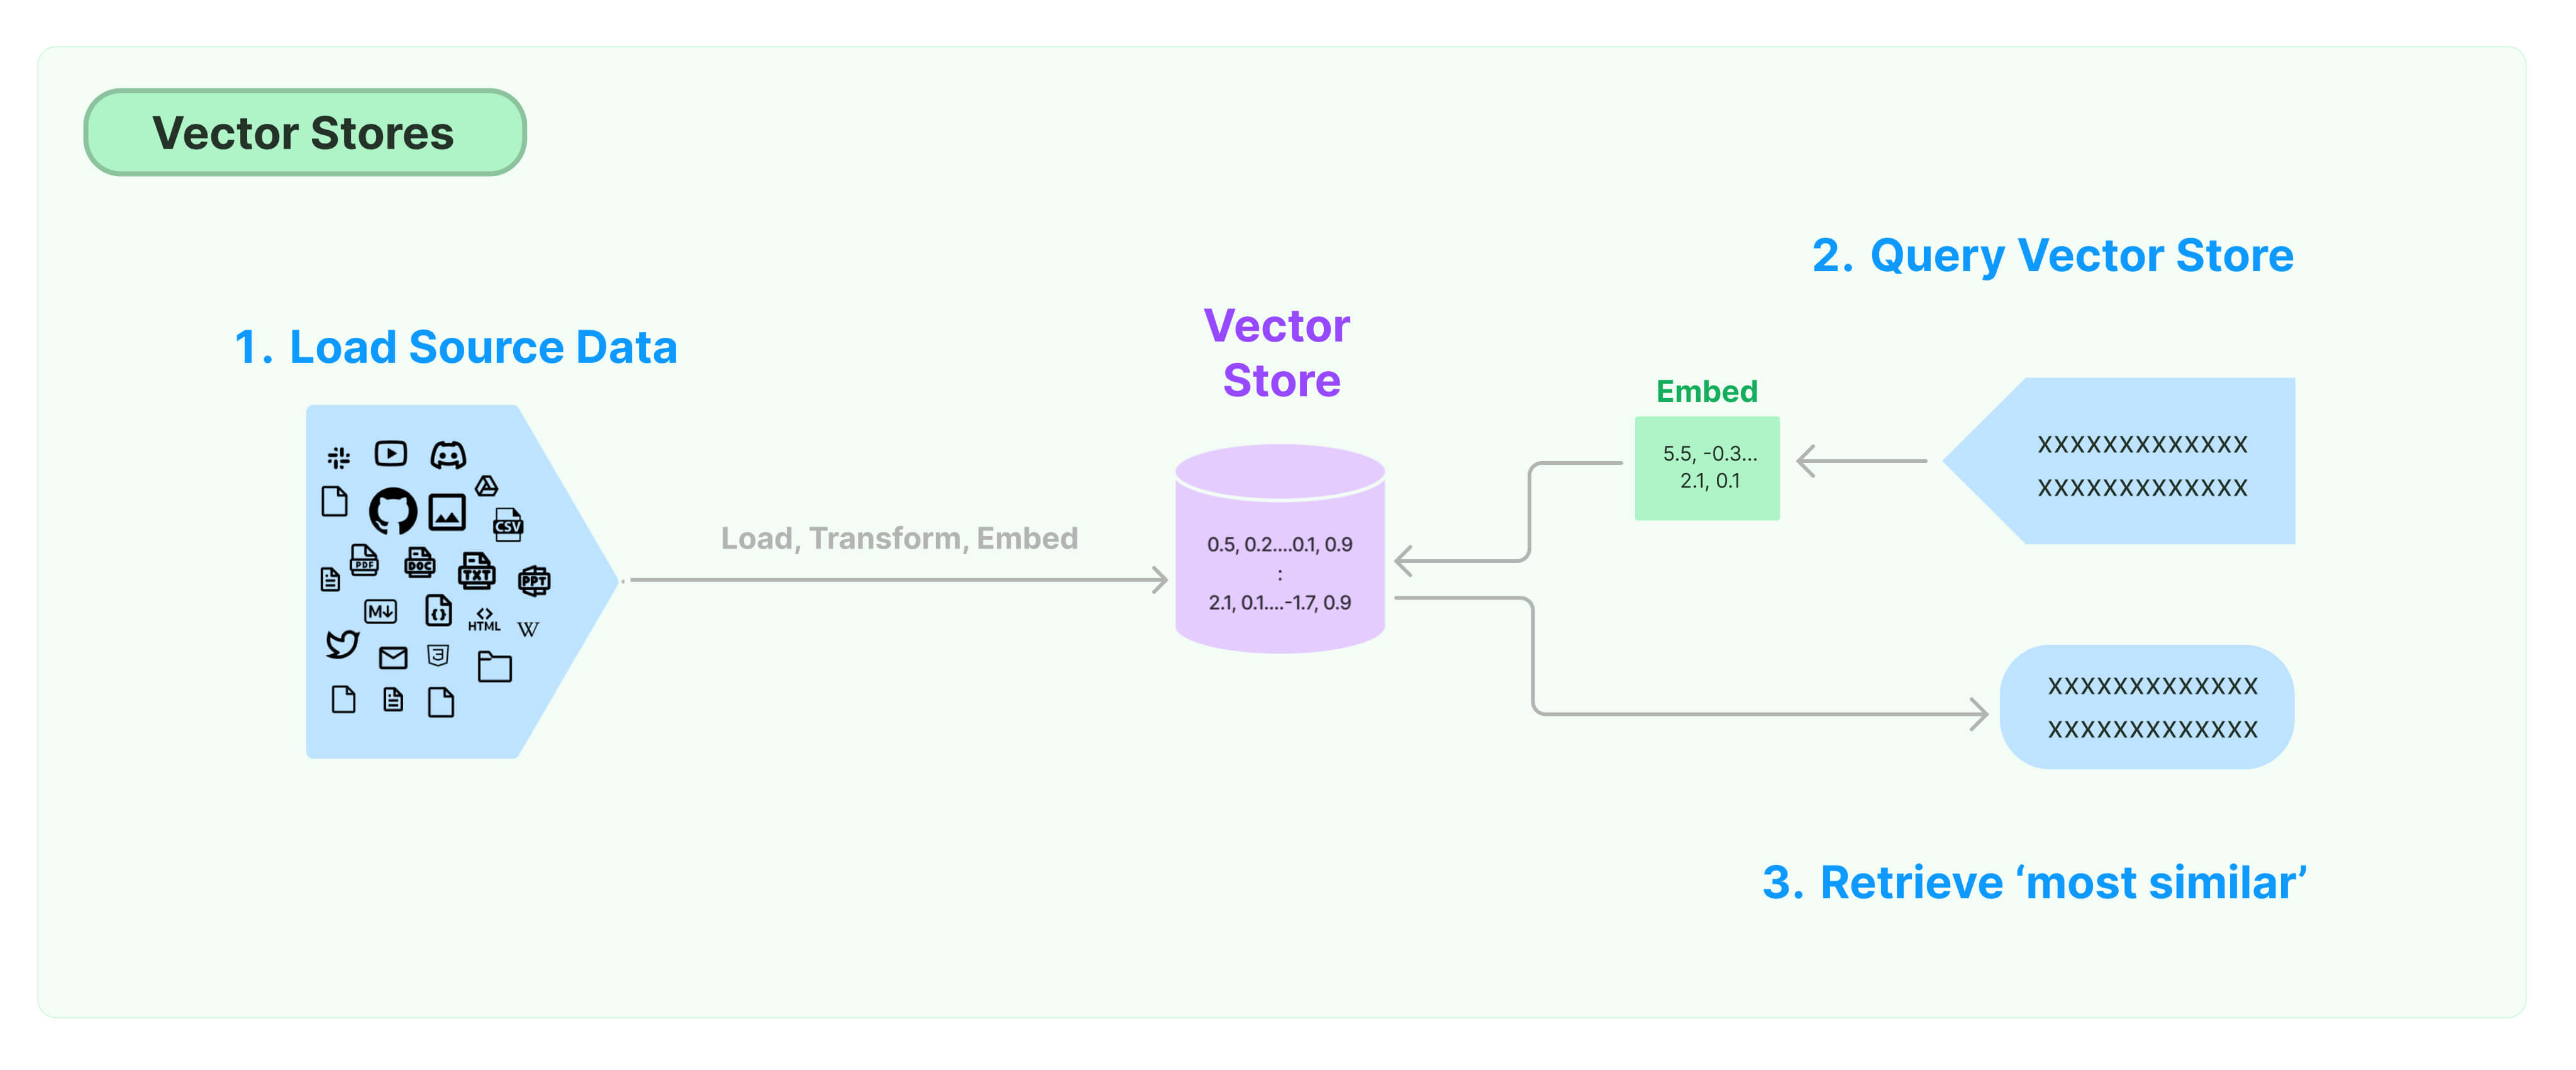

Vector stores are commonly used for retrieval, but there are other ways to do retrieval, too.

Retriever: An object that returns Documents given a text query

Docs: Further documentation on the interface and built-in retrieval techniques. Some of which include:

MultiQueryRetriever generates variants of the input question to improve retrieval hit rate.

MultiVectorRetriever (diagram below) instead generates variants of the embeddings, also in order to improve retrieval hit rate.

Max marginal relevance selects for relevance and diversity among the retrieved documents to avoid passing in duplicate context.

Documents can be filtered during vector store retrieval using metadata filters, such as with a Self Query Retriever.

Integrations: Integrations with retrieval services.

Interface: API reference for the base interface.

Using the Langchain syntax we don't have to save Embeddings in our local machine but we can use directly the Vector Store provided and builded ad-hoc for these purpose 

In [75]:
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS





# Load the document, split it into chunks, embed each chunk and load it into the vector store.
raw_documents = TextLoader("costit.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)
db = FAISS.from_documents(documents, OpenAIEmbeddings())

**`Legal Domain`**

Small Example

In [76]:
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS


db = FAISS.from_documents(texts, OpenAIEmbeddings())

**CacheBackedEmbeddings**

Embeddings can be stored or temporarily cached to avoid needing to recompute them.

Caching embeddings can be done using a CacheBackedEmbeddings. The cache backed embedder is a wrapper around an embedder that caches embeddings in a key-value store. The text is hashed and the hash is used as the key in the cache.

The main supported way to initialized a CacheBackedEmbeddings is from_bytes_store. This takes in the following parameters:

underlying_embedder: The embedder to use for embedding.
document_embedding_cache: Any ByteStore for caching document embeddings.
namespace: (optional, defaults to "") The namespace to use for document cache. This namespace is used to avoid collisions with other caches. For example, set it to the name of the embedding model used.

In [77]:
from langchain.embeddings import CacheBackedEmbeddings

In [78]:
%pip install --upgrade --quiet  langchain-openai faiss-cpu

Note: you may need to restart the kernel to use updated packages.


In [79]:
from langchain.storage import LocalFileStore
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter

underlying_embeddings = OpenAIEmbeddings()

store = LocalFileStore("./cache/")

cached_embedder = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings, store, namespace=underlying_embeddings.model
)

In [80]:
list(store.yield_keys())

['text-embedding-ada-0020277ba09-854a-5164-938e-8edfaea2bb4e',
 'text-embedding-ada-00205af9ffd-f376-59d6-8813-538a7b70c822',
 'text-embedding-ada-00206659102-4040-5c2a-b9cf-f33d65aa51a4',
 'text-embedding-ada-0020d286a1a-eae3-55c6-b40c-cbad986a2d56',
 'text-embedding-ada-0021f0ec23c-0aa8-5bf9-b789-23a75a331aa7',
 'text-embedding-ada-00222ee35dc-c9d6-52d6-a316-1a940d44362a',
 'text-embedding-ada-0022b852199-5085-54d4-917f-4b5736d2380a',
 'text-embedding-ada-002394baca7-8d74-55d7-9e82-e808f5afc008',
 'text-embedding-ada-002410677ea-7141-58ad-82fb-42ab186780dc',
 'text-embedding-ada-002433376f2-11ef-51e0-b9f7-e2d3420ffa44',
 'text-embedding-ada-00252df9e85-6f65-5fed-80b1-965d2fbb8e08',
 'text-embedding-ada-00253d4bc38-af89-52b0-939e-beb9071def37',
 'text-embedding-ada-0025c1d65a3-8ec5-51c6-ac7e-0f9979a7be54',
 'text-embedding-ada-00263005ba4-89d4-55ef-b9c8-91917d191f7f',
 'text-embedding-ada-0026494f58f-0a85-5dc7-a407-ff0615504794',
 'text-embedding-ada-00267420083-4ee7-546f-ae76-a4f4f34

In [81]:
%%time
db = FAISS.from_documents(texts, cached_embedder)

CPU times: total: 0 ns
Wall time: 47.9 ms


In [82]:
%%time
db2 = FAISS.from_documents(texts, cached_embedder)

CPU times: total: 15.6 ms
Wall time: 45.4 ms


*The execution time decreased drastically*

In [83]:
list(store.yield_keys())[:5]

['text-embedding-ada-0020277ba09-854a-5164-938e-8edfaea2bb4e',
 'text-embedding-ada-00205af9ffd-f376-59d6-8813-538a7b70c822',
 'text-embedding-ada-00206659102-4040-5c2a-b9cf-f33d65aa51a4',
 'text-embedding-ada-0020d286a1a-eae3-55c6-b40c-cbad986a2d56',
 'text-embedding-ada-0021f0ec23c-0aa8-5bf9-b789-23a75a331aa7']

#### **Different Types of Search**

**Similarity Search**


In [84]:
query = "Explain for me what is written of asylium "
docs = db.similarity_search(query)
print(docs[0].page_content)

18  
Right to asylum  
The right to asylum shall be guaranteed with due re spect for the rules of the Geneva Convention 
of 28 July 1951 and the Protocol of 31 January 1967 relating to the status of refugees and in 
accordance with the Treaty on European Union and the Treaty on the Functioning of the 
European Union (hereinafter referred to as  'the Treaties '). 
Article 19  
Protection in the event of removal, expulsion or extradition  
1. Collective expulsions are prohibited.  
2. No one may be removed, expelled or extradited to a State where there is a serious risk that he 
or she would be subjected to the death penalty, tortu re or other inhuman or degrading treatment or 
punishment.  
TITLE III  
EQUALITY  
Article 20  
Equality before the law  
Everyone is equal before the law.EN 7.6.2016 Official Journal of the European Union C 202/397


In [85]:
embedding_vector = OpenAIEmbeddings().embed_query(query)
docs = db.similarity_search_by_vector(embedding_vector)
print(docs[0].page_content)

18  
Right to asylum  
The right to asylum shall be guaranteed with due re spect for the rules of the Geneva Convention 
of 28 July 1951 and the Protocol of 31 January 1967 relating to the status of refugees and in 
accordance with the Treaty on European Union and the Treaty on the Functioning of the 
European Union (hereinafter referred to as  'the Treaties '). 
Article 19  
Protection in the event of removal, expulsion or extradition  
1. Collective expulsions are prohibited.  
2. No one may be removed, expelled or extradited to a State where there is a serious risk that he 
or she would be subjected to the death penalty, tortu re or other inhuman or degrading treatment or 
punishment.  
TITLE III  
EQUALITY  
Article 20  
Equality before the law  
Everyone is equal before the law.EN 7.6.2016 Official Journal of the European Union C 202/397


## STATIC RAG ENQUIRYING CONSTITUTION (LEGAL DOMAIN)

**RAG Architecture**


A typical RAG application has two main components:

- Indexing: a pipeline for ingesting data from a source and indexing it. This usually happens offline.

- Retrieval and generation: the actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.

The most common full sequence from raw data to answer looks like:

- Indexing What we did ! 

Load: First we need to load our data. This is done with DocumentLoaders.
Split: Text splitters break large Documents into smaller chunks. This is useful both for indexing data and for passing it in to a model, since large chunks are harder to search over and won’t fit in a model’s finite context window.
Store: We need somewhere to store and index our splits, so that they can later be searched over. This is often done using a VectorStore and Embeddings model.

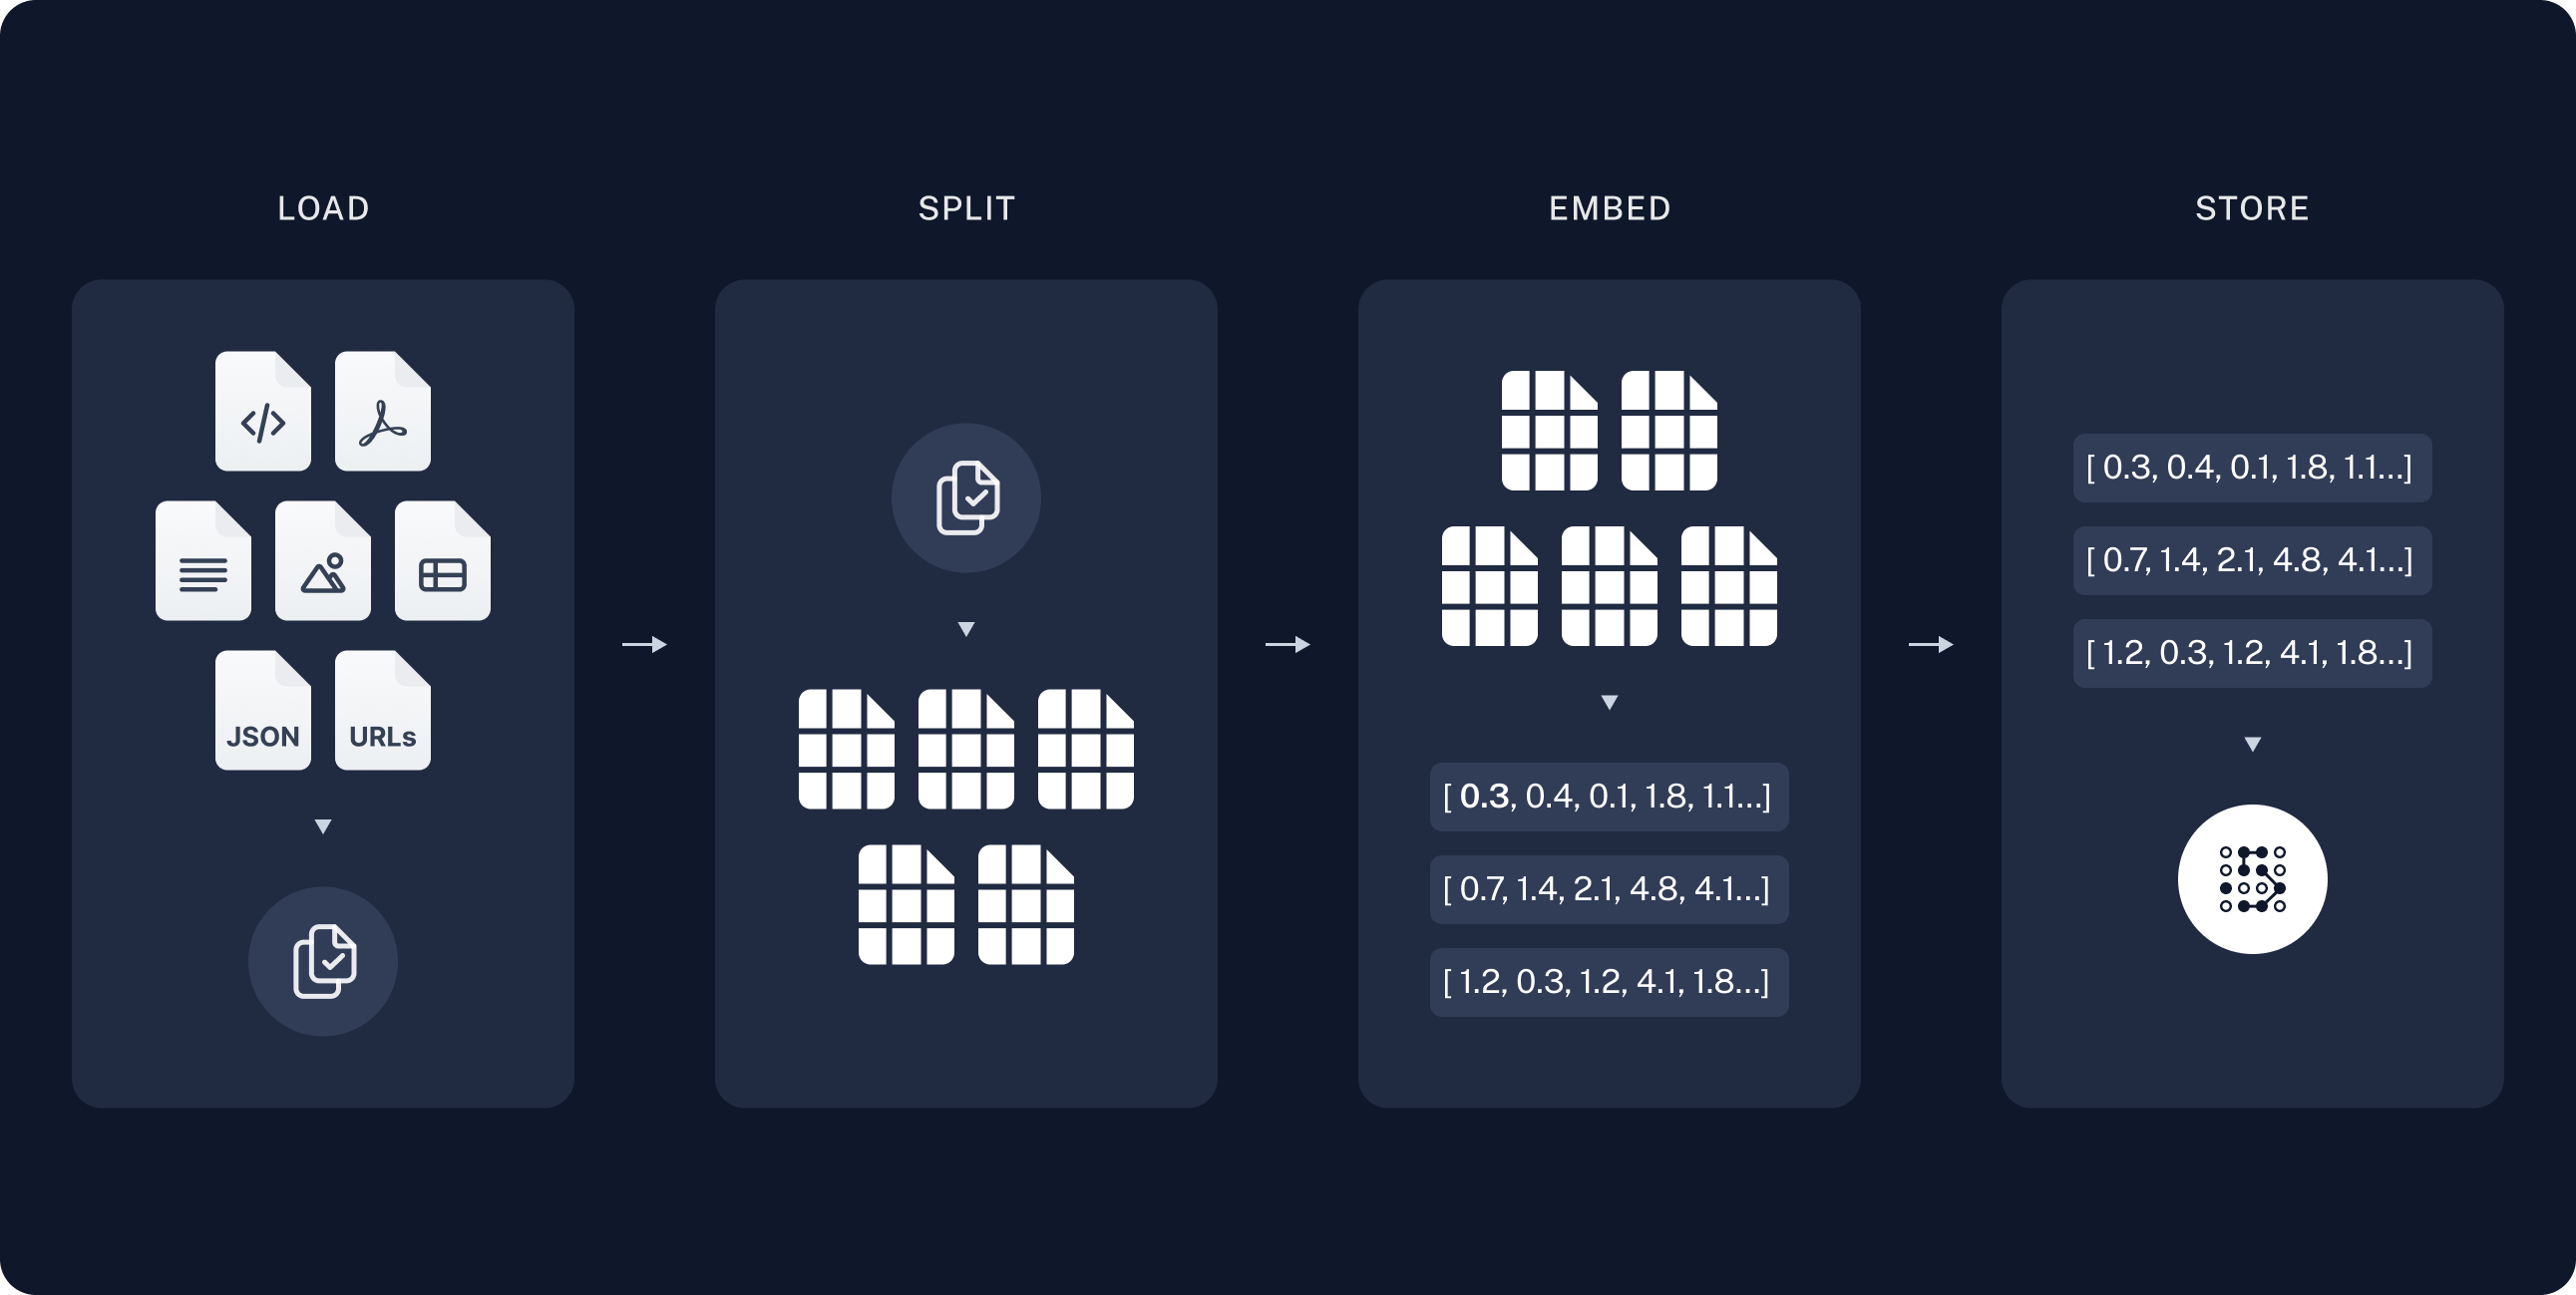

`Retrieval` 

Retrieval and generation
1. Retrieve: Given a user input, relevant splits are retrieved from storage using a Retriever.
2. Generate: A ChatModel / LLM produces an answer using a prompt that includes the question and the retrieved data

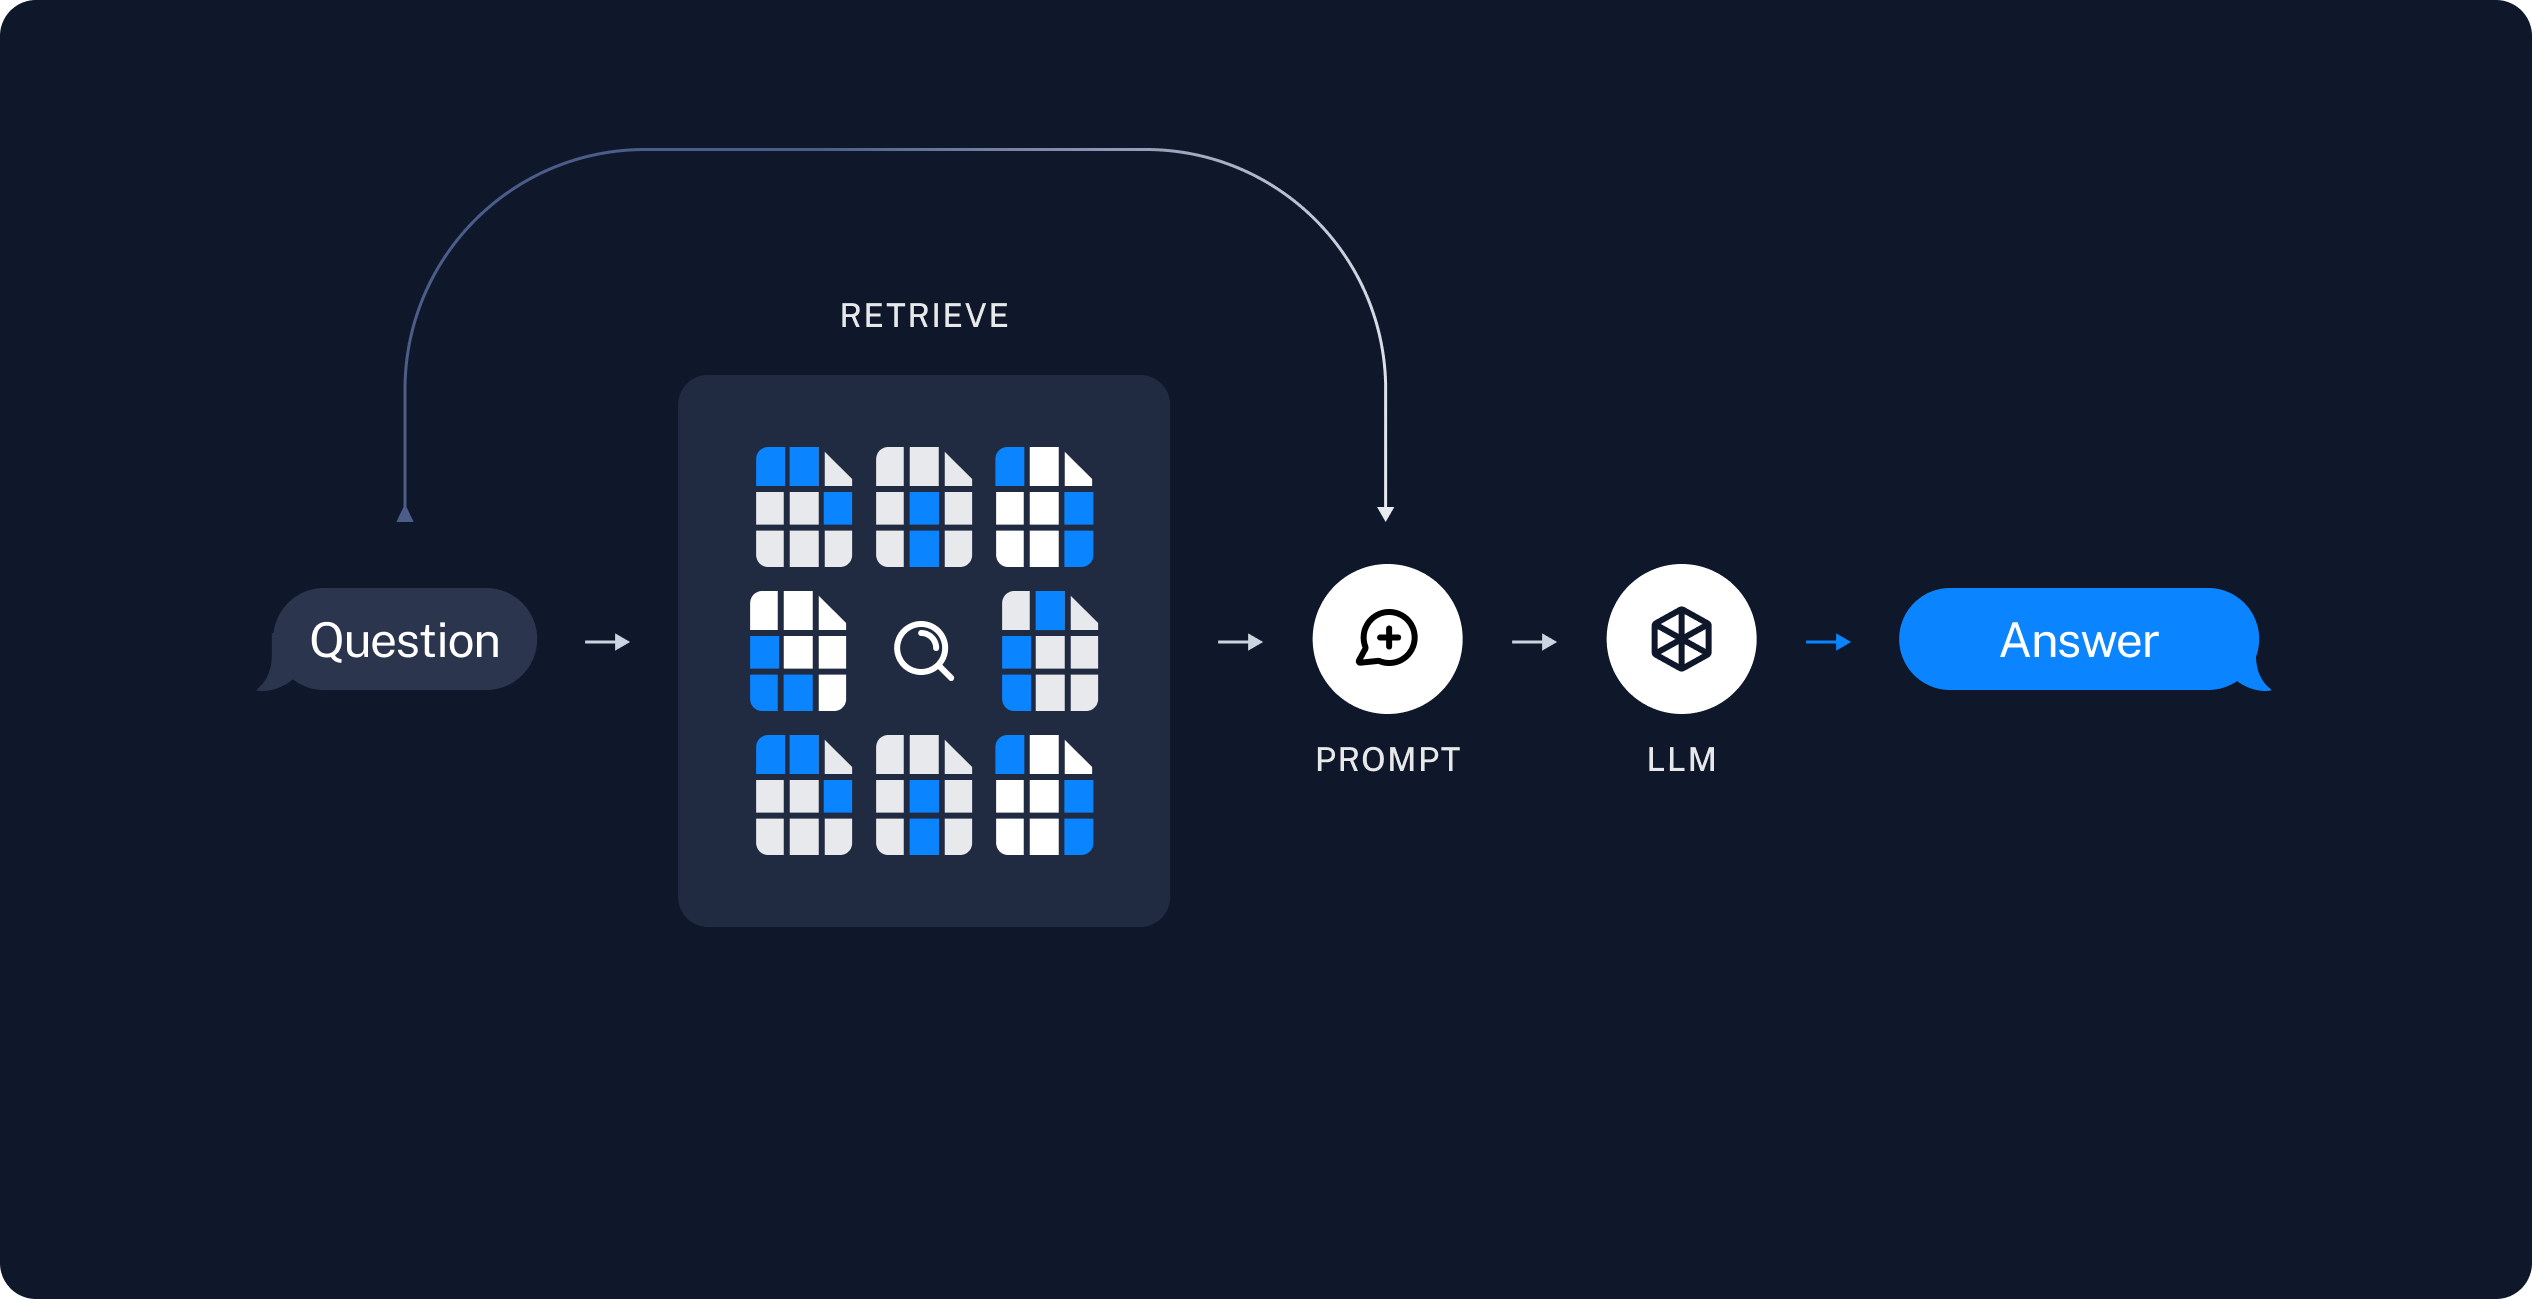

RAG IN ACTION! 

In [86]:
%pip install --upgrade --quiet  langchain langchain-community langchainhub langchain-openai langchain-chroma bs4

Note: you may need to restart the kernel to use updated packages.


In [87]:
import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_chroma import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [88]:
# Retrieve and generate using the relevant snippets of the blog.
retriever =db2.as_retriever()
prompt = hub.pull("rlm/rag-prompt")

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [89]:
rag_chain.invoke("What is Freedom of speech referencing the International Chart of civil rights?") 

'Freedom of speech is referenced in Article 11 of the International Chart of civil rights. It states that everyone has the right to freedom of expression, including the freedom to hold opinions and to receive and impart information and ideas without interference by public authority. The freedom and pluralism of the media are also to be respected.'